In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [3]:
df


,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'] 
X = df.drop("Loan_ID", axis=1)  


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(613, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [11]:
df['Loan_Amount_Term'].nunique()

10

In [12]:
df['Dependents'].nunique()

4

In [13]:
df['LoanAmount'].nunique()


203

In [14]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [15]:
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df.shape

(613, 13)

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,342.381729,0.854812
std,6114.004114,2927.903583,84.106098,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# EDA

In [21]:
import matplotlib.pyplot as plt

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


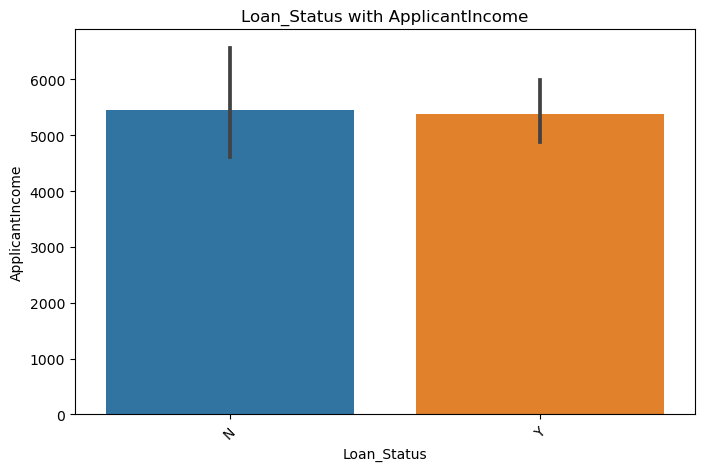

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

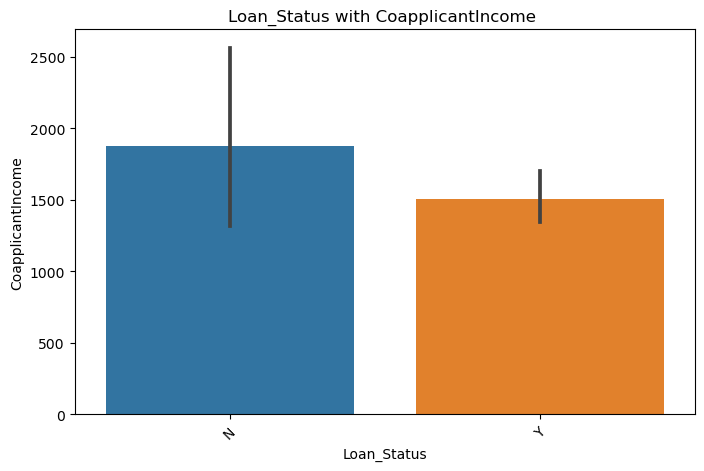

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome ")
plt.xticks(rotation=45)
plt.show()

 CoapplicantIncome is high might be thats depends on all other figures

<Axes: xlabel='Property_Area', ylabel='count'>

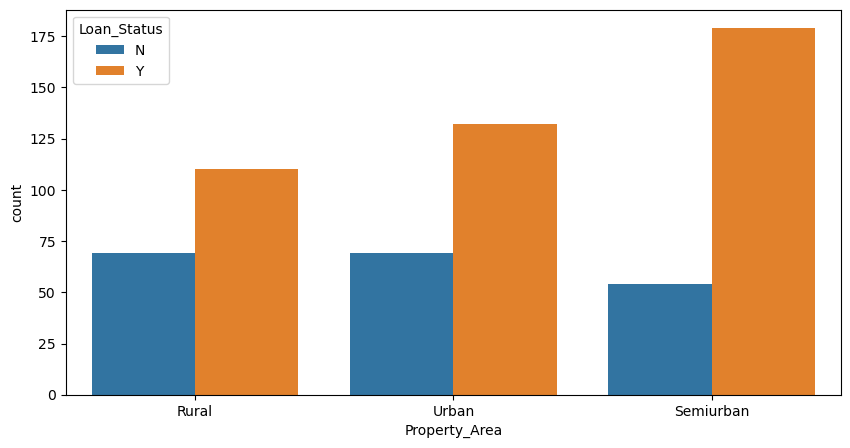

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

*RuralProperty_area not approval chances are increasing
* Semiurban area there are high chances to get approval

<Axes: xlabel='Credit_History', ylabel='count'>

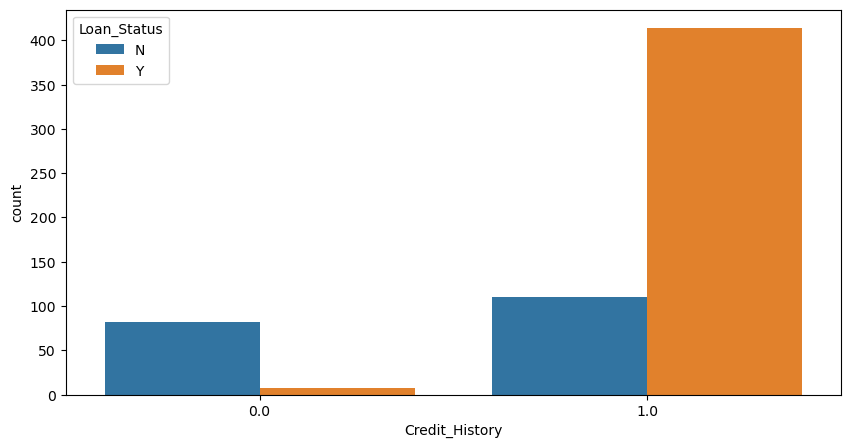

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

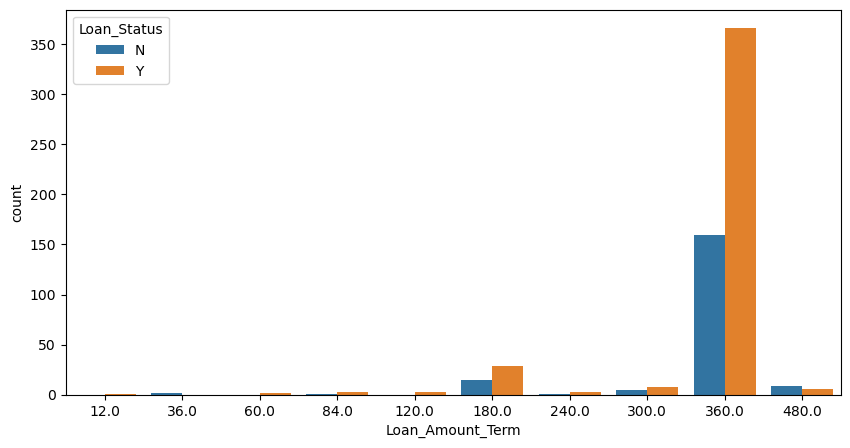

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

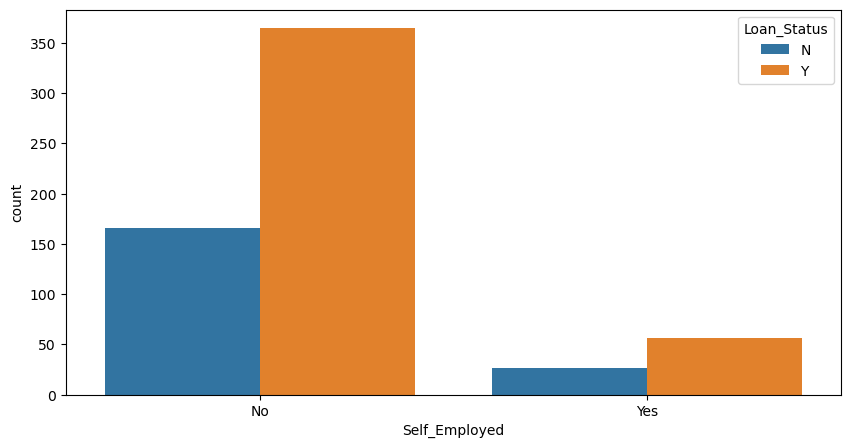

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

 Around 50% of diffrence between approved and not approved people

<Axes: xlabel='Education', ylabel='count'>

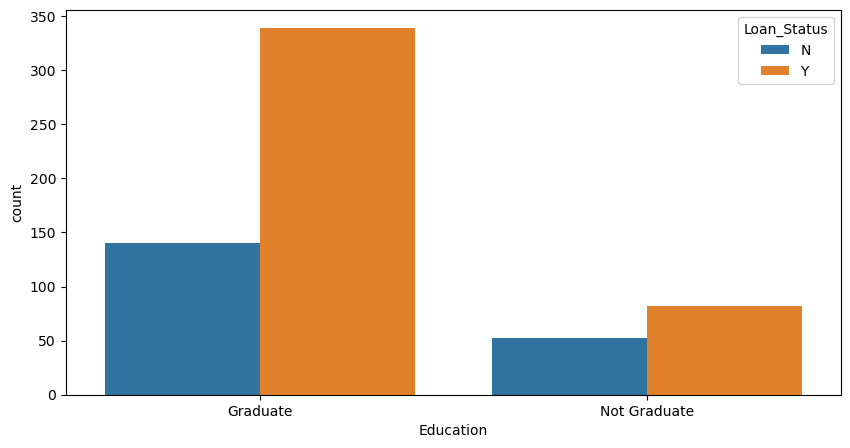

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education',hue='Loan_Status',data=df)

Around 350 approved loan and around 150 not approved

<Axes: xlabel='Dependents', ylabel='count'>

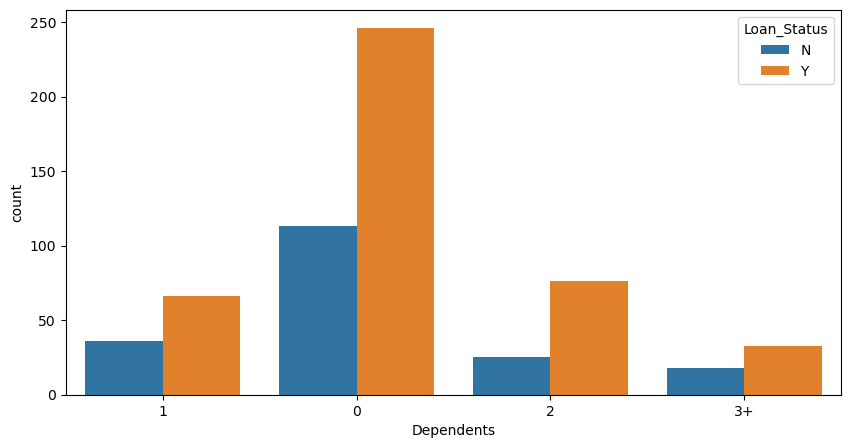

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

# Converting Categorical into numerical

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             613 non-null    object 
 2   Married            613 non-null    object 
 3   Dependents         613 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      613 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         613 non-null    float64
 9   Loan_Amount_Term   613 non-null    float64
 10  Credit_History     613 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            613 non-null    int32
 1   Gender             613 non-null    int32
 2   Married            613 non-null    int32
 3   Dependents         613 non-null    int32
 4   Education          613 non-null    int32
 5   Self_Employed      613 non-null    int32
 6   ApplicantIncome    613 non-null    int64
 7   CoapplicantIncome  613 non-null    int64
 8   LoanAmount         613 non-null    int64
 9   Loan_Amount_Term   613 non-null    int64
 10  Credit_History     613 non-null    int64
 11  Property_Area      613 non-null    int32
 12  Loan_Status        613 non-null    int32
dtypes: int32(8), int64(5)
memory usage: 43.2 KB


# Skewness

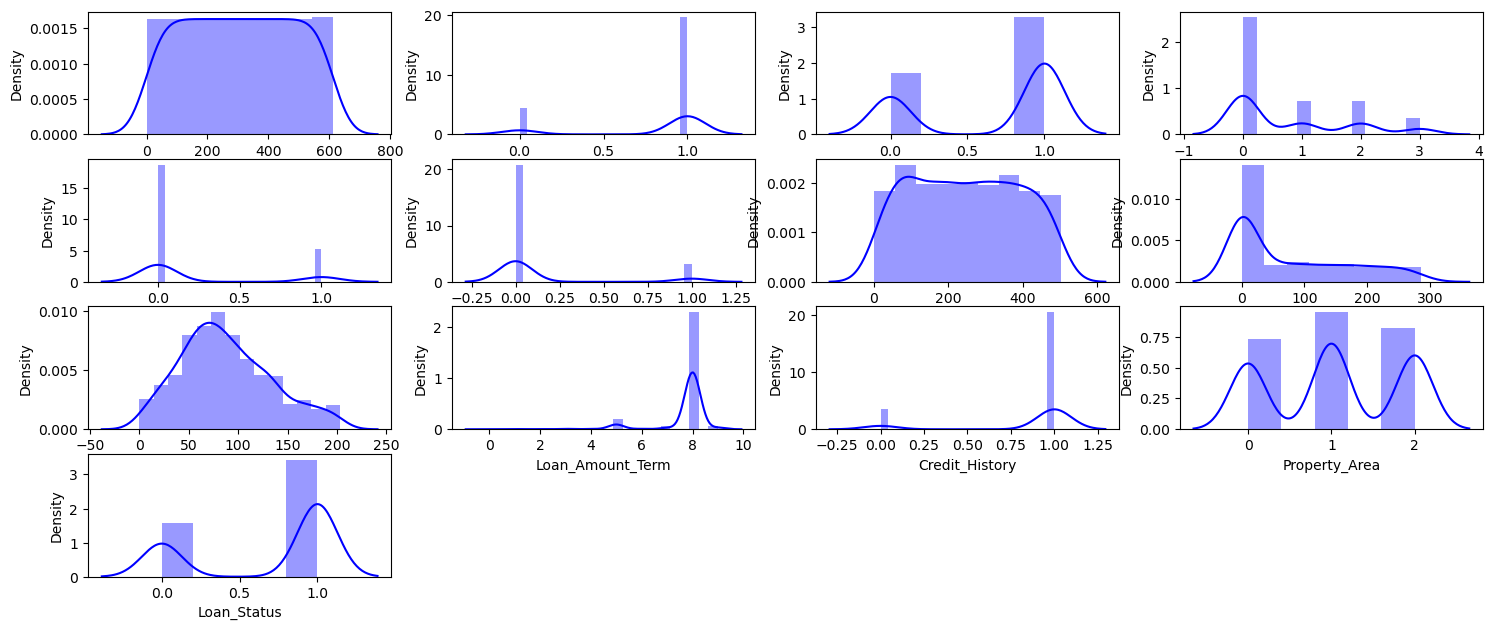

In [35]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [36]:
df.skew()

Loan_ID              0.000000
Gender              -1.646215
Married             -0.649810
Dependents           1.013119
Education            1.365098
Self_Employed        2.157034
ApplicantIncome      0.040367
CoapplicantIncome    0.778458
LoanAmount           0.459712
Loan_Amount_Term    -3.313316
Credit_History      -2.019265
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [37]:
from sklearn.preprocessing import power_transform
df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

# Checking Outliers

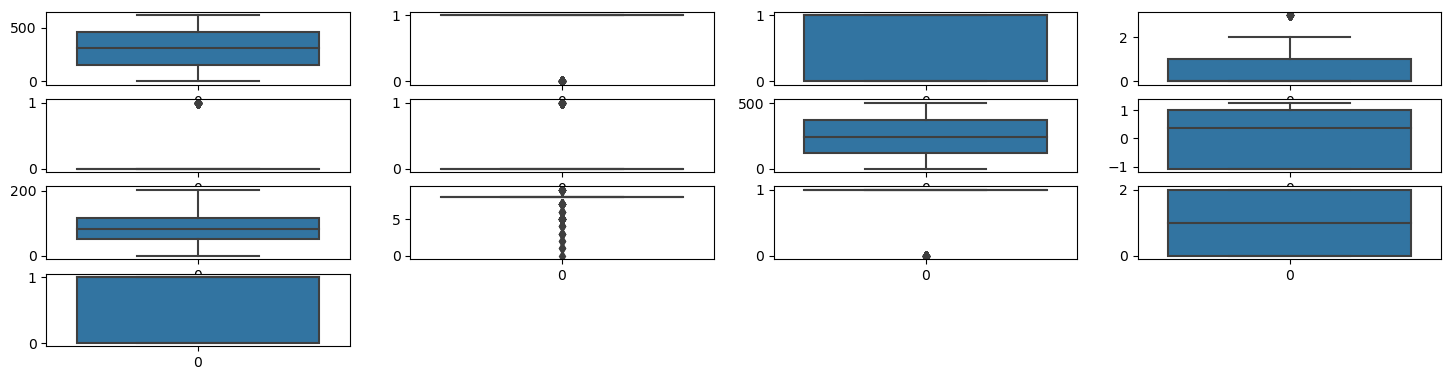

In [38]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

some of columns seems having outliers after skewness removed

# Zscore

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 13,  67,  93, 132, 241, 261, 312, 494, 496, 545, 574, 584],
      dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int64))


In [40]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (613, 13)
After removing outliers:: (601, 13)


some of columns seems having outliers after skewness removed

# IQR

In [42]:
 from scipy import stats
IQR=stats.iqr(df)
IQR

8.0

In [43]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
df_out=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df_out.shape)

(132, 13)


huge data loss in IQR

# Dividing X&Y 

In [44]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [45]:
x.shape

(613, 12)

In [46]:
y.shape

(613,)

# scaling x val

In [47]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [48]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [49]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,613.000000,613.000000,613.00000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.500000,0.817292,0.65416,0.248505,0.218597,0.133768,0.490392,0.456915,0.432019,0.851912,0.854812,0.517945
std,0.289383,0.386743,0.47603,0.336666,0.413632,0.340681,0.284775,0.425563,0.225147,0.123339,0.352578,0.393581
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,1.000000,0.00000,0.000000,0.000000,0.000000,0.238569,0.000000,0.261084,0.888889,1.000000,0.000000
50%,0.500000,1.000000,1.00000,0.000000,0.000000,0.000000,0.485089,0.609767,0.403941,0.888889,1.000000,0.500000
75%,0.750000,1.000000,1.00000,0.333333,0.000000,0.000000,0.733598,0.883379,0.576355,0.888889,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Spliting Train and Test data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [52]:
x_train.shape,x_test.shape

((447, 12), (166, 12))

In [53]:
y_train.shape,y_test.shape

((447,), (166,))

# MODEL BULIDING

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# LOGISTIC REGRESSION

In [89]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=4,scoring='accuracy')
print("cross validation score",np.mean(logreg_score))

cross validation score 0.8075184619302265


In [90]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)
print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7891566265060241
[[ 19  34]
 [  1 112]]
              precision    recall  f1-score   support

           0       0.95      0.36      0.52        53
           1       0.77      0.99      0.86       113

    accuracy                           0.79       166
   macro avg       0.86      0.67      0.69       166
weighted avg       0.83      0.79      0.75       166

Training accuracy:: 0.8165548098434005
Test accuracy:: 0.7891566265060241


# DECISION TREE CLASSIFIER

In [91]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation scorefor svm:",np.mean(dtc_score))

cross validation scorefor svm: 0.7048114087698254


In [92]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7108433734939759
[[27 26]
 [22 91]]
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        53
           1       0.78      0.81      0.79       113

    accuracy                           0.71       166
   macro avg       0.66      0.66      0.66       166
weighted avg       0.71      0.71      0.71       166

Training accuracy:: 1.0
Test accuracy:: 0.7108433734939759


# KNEIGHBORS CLASSIFIER

In [93]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation scorefor knn:",np.mean(knn_score))

cross validation scorefor knn: 0.7716913234706119


In [94]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7831325301204819
[[ 20  33]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.87      0.38      0.53        53
           1       0.77      0.97      0.86       113

    accuracy                           0.78       166
   macro avg       0.82      0.68      0.69       166
weighted avg       0.80      0.78      0.75       166

Training accuracy:: 0.8076062639821029
Test accuracy:: 0.7831325301204819


# RANDAM FOREST CLASSIFIER

In [95]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.7765693722510995


In [96]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.7771084337349398
[[ 19  34]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.86      0.36      0.51        53
           1       0.76      0.97      0.86       113

    accuracy                           0.78       166
   macro avg       0.81      0.67      0.68       166
weighted avg       0.80      0.78      0.74       166

Training accuracy:: 1.0
Test accuracy:: 0.7771084337349398


# ENSEMBLE TECHNIQUES

# ADA BOOST CLASSIFIER

In [97]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.7379164463246959


In [98]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.7168674698795181
[[21 32]
 [15 98]]
              precision    recall  f1-score   support

           0       0.58      0.40      0.47        53
           1       0.75      0.87      0.81       113

    accuracy                           0.72       166
   macro avg       0.67      0.63      0.64       166
weighted avg       0.70      0.72      0.70       166

Training accuracy:: 0.8702460850111857
Test accuracy:: 0.7168674698795181


# BAGGING CLASSIFIER

In [99]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.739476467477525


In [100]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7590361445783133
[[ 26  27]
 [ 13 100]]
              precision    recall  f1-score   support

           0       0.67      0.49      0.57        53
           1       0.79      0.88      0.83       113

    accuracy                           0.76       166
   macro avg       0.73      0.69      0.70       166
weighted avg       0.75      0.76      0.75       166

Training accuracy:: 0.9955257270693513
Test accuracy:: 0.7590361445783133


# GRADIENT BOOSTING CLASSIFIER

In [101]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7460074034902168


In [105]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.7530120481927711
[[ 19  34]
 [  7 106]]
              precision    recall  f1-score   support

           0       0.73      0.36      0.48        53
           1       0.76      0.94      0.84       113

    accuracy                           0.75       166
   macro avg       0.74      0.65      0.66       166
weighted avg       0.75      0.75      0.72       166

Training accuracy:: 0.912751677852349
Test accuracy:: 0.7530120481927711
